# $PHMM$ on (monthly, yearly) data agg

## EDA

EDA of the time series to find the earthquakes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import poisson
from hmmlearn import hmm

In [2]:
df = pd.read_csv("All Earthquakes.csv")
df.head(5)

,No.,Orgin date,Longitude(E),Latitude(N),Magnitude,Depth,Location,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Small area,2025-02-12 0:09,121.942,24.3840,3.8,24.3,24.38N 121.94E,i.e. 42.5 km SSE of Yilan County(24.38N 121.94E,i.e. 42.5 km SSE of Yilan County),NaN,NaN
1,64,2025-02-11 22:04,121.665,24.1742,4.0,13.3,24.17N 121.66E,i.e. 20.8 km NNE of Hualien County(24.17N 121...,i.e. 20.8 km NNE of Hualien County),NaN,NaN
2,Small area,2025-02-11 20:46,120.459,23.5483,3.2,5.6,23.55N 120.46E,i.e. 19.6 km ENE of Chiayi County(23.55N 120.46E,i.e. 19.6 km ENE of Chiayi County),NaN,NaN
3,63,2025-02-11 15:52,120.496,23.2458,4.1,7.7,23.25N 120.50E,i.e. 42.5 km NE of Tainan City(23.25N 120.50E,i.e. 42.5 km NE of Tainan City),NaN,NaN
4,Small area,2025-02-11 15:45,120.505,23.2862,3.6,7.5,23.29N 120.50E,i.e. 46.2 km NE of Tainan City(23.29N 120.50E,i.e. 46.2 km NE of Tainan City),NaN,NaN


# $PHMM$ on (daily, monthly, yearly) data agg

## EDA

EDA of the time series to find the earthquakes

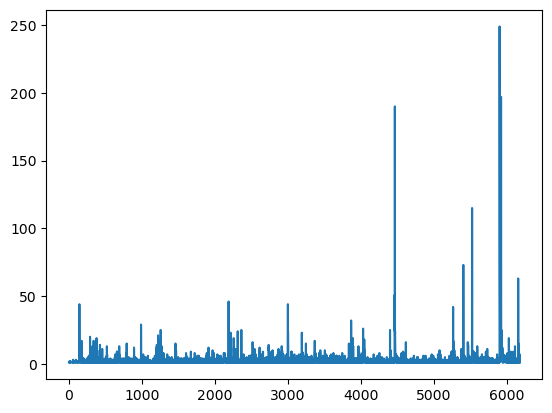

In [16]:
years = pd.to_datetime(df['Orgin date']).dt.year
months = pd.to_datetime(df['Orgin date']).dt.month
days = pd.to_datetime(df['Orgin date']).dt.day

dates = pd.DataFrame({'years': years, 'months': months, 'days': days})

counts = dates.groupby(['years', 'months', 'days']).size()
plt.plot(np.array(counts))

In [35]:
scores = list()
models = list()

earthquakes = np.array(counts).reshape(-1,1)

for n_components in range(1, 5):
    for idx in range(5):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes)
        models.append(model)
        scores.append(model.score(earthquakes))
        # print(f'Converged: {model.monitor_.converged}\t\t'
        #       f'Score: {scores[-1]}')

# get the best model
model1 = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model1.predict(earthquakes)

The best model had a score of -11078.408118260739 and 4 components


In [34]:
scores = list()
models = list()

earthquakes = np.array(counts).reshape(-1,1)

for n_components in range(1, 10):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes)
        models.append(model)
        scores.append(model.score(earthquakes))
        # print(f'Converged: {model.monitor_.converged}\t\t'
        #       f'Score: {scores[-1]}')

# get the best model
model2 = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model2.predict(earthquakes)

The best model had a score of -10766.56809738259 and 9 components


In [38]:
scores = list()
models = list()

earthquakes = np.array(counts).reshape(-1,1)

for n_components in range(1, 20):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes)
        models.append(model)
        scores.append(model.score(earthquakes))
        # print(f'Converged: {model.monitor_.converged}\t\t'
        #       f'Score: {scores[-1]}')

# get the best model
model3 = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model3.predict(earthquakes)

The best model had a score of -10672.304913912656 and 19 components


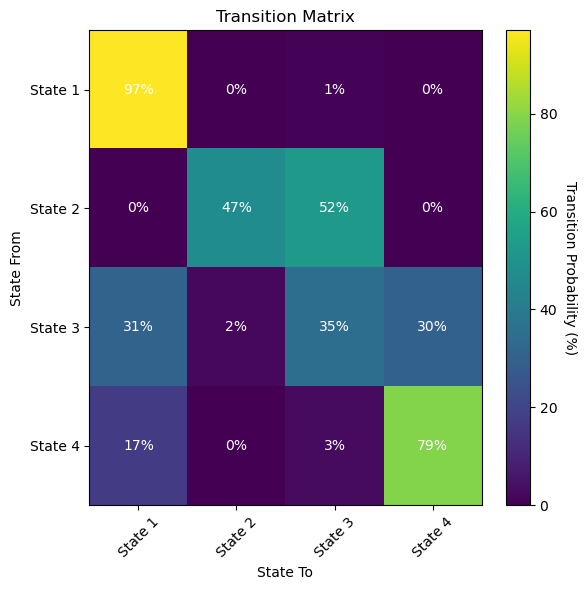

<Figure size 640x480 with 0 Axes>

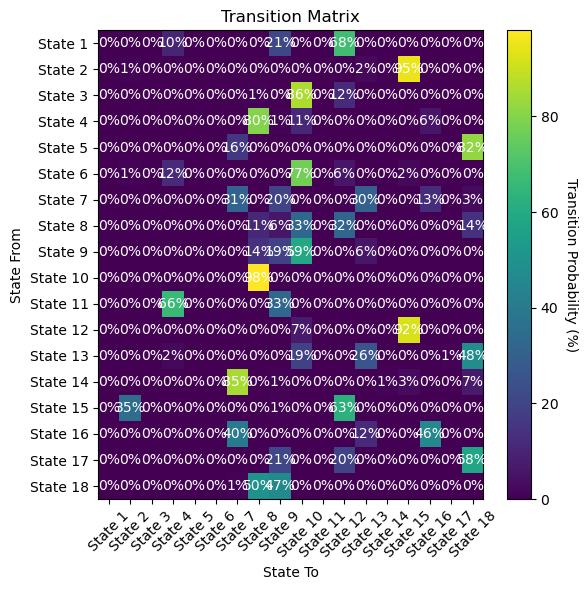

<Figure size 640x480 with 0 Axes>

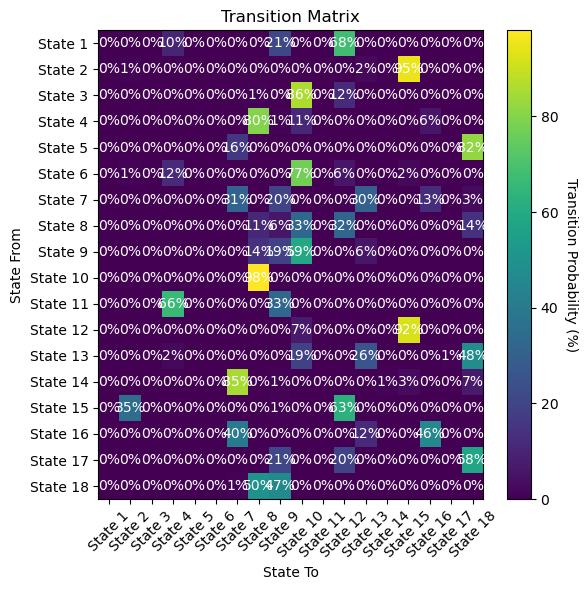

<Figure size 640x480 with 0 Axes>

In [39]:
# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
# states = model1.predict(earthquakes)
# fig, ax = plt.subplots()
# ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
# ax.plot(earthquakes)
# ax.set_title('States compared to generated')
# ax.set_xlabel('State')


transmat_int1 = (model1.transmat_ * 100).astype(int)
transmat_int2 = (model2.transmat_ * 100).astype(int)
transmat_int3 = (model3.transmat_ * 100).astype(int)

# Create the heatmap
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(transmat_int1, aspect='auto', cmap='viridis')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Transition Probability (%)', rotation=-90, va="bottom")
for i in range(transmat_int1.shape[0]):
    for j in range(transmat_int1.shape[1]):
        ax.text(j, i, f'{transmat_int1[i, j]}%', ha='center', va='center', color='white')   
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')
ax.set_xticks(np.arange(transmat_int1.shape[1]))
ax.set_yticks(np.arange(transmat_int1.shape[0]))
ax.set_xticklabels([f'State {i+1}' for i in range(transmat_int1.shape[1])])
ax.set_yticklabels([f'State {i+1}' for i in range(transmat_int1.shape[0])])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("trans_mat_daily_prob_5.png")


fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(transmat_int2, aspect='auto', cmap='viridis')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Transition Probability (%)', rotation=-90, va="bottom")
for i in range(transmat_int2.shape[0]):
    for j in range(transmat_int2.shape[1]):
        ax.text(j, i, f'{transmat_int2[i, j]}%', ha='center', va='center', color='white')   
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')
ax.set_xticks(np.arange(transmat_int2.shape[1]))
ax.set_yticks(np.arange(transmat_int2.shape[0]))
ax.set_xticklabels([f'State {i+1}' for i in range(transmat_int2.shape[1])])
ax.set_yticklabels([f'State {i+1}' for i in range(transmat_int2.shape[0])])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("trans_mat_daily_prob_10.png")


fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(transmat_int3, aspect='auto', cmap='viridis')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Transition Probability (%)', rotation=-90, va="bottom")
for i in range(transmat_int3.shape[0]):
    for j in range(transmat_int3.shape[1]):
        ax.text(j, i, f'{transmat_int3[i, j]}%', ha='center', va='center', color='white')   
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')
ax.set_xticks(np.arange(transmat_int3.shape[1]))
ax.set_yticks(np.arange(transmat_int3.shape[0]))
ax.set_xticklabels([f'State {i+1}' for i in range(transmat_int3.shape[1])])
ax.set_yticklabels([f'State {i+1}' for i in range(transmat_int3.shape[0])])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("trans_mat_daily_prob_20.png")

# prop_per_state = model.predict_proba(earthquakes).mean(axis=0)

# # earthquake counts to plot
# bins = sorted(np.unique(earthquakes))

# fig, ax = plt.subplots()
# ax.hist(earthquakes, bins=bins, density=True)
# ax.plot(bins, poisson.pmf(bins, model.lambdas_).T @ prop_per_state)
# ax.set_title('Histogram of Earthquakes with Fitted Poisson States')
# ax.set_xlabel('Number of Earthquakes')
# ax.set_ylabel('Proportion')

plt.show()